In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:
# Display the first few rows of the dataset
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# Perform some basic data exploration
print(titanic_df.info())
print(titanic_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [ ]:
# Check for missing values
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Fill missing age values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

<ipython-input-72-1ea83eeeeace>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [ ]:
# Fill missing embarked values with the most frequent value
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

<ipython-input-73-f5a7f5cc72b7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)


In [ ]:
# Drop the Cabin column as it has many missing values
titanic_df.drop('Cabin', axis=1, inplace=True)

# Convert the 'Sex' column to numerical values (0 for female, 1 for male)
titanic_df['Sex'] = titanic_df['Sex'].map({'female': 0, 'male': 1})

# Convert the 'Embarked' column to numerical values using one-hot encoding
embarked_dummies = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')
titanic_df = pd.concat([titanic_df, embarked_dummies], axis=1)
titanic_df.drop('Embarked', axis=1, inplace=True)

# Verify the changes
print(titanic_df.isnull().sum())
print(titanic_df.info())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_C   891 non-null    bool   
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), in

In [ ]:
# Assuming 'PassengerId', 'Name', and 'Ticket' are not useful for your analysis
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Verify the changes
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB
None


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features (X) and target variable (y)
X = titanic_df.iloc[:, :-1]  # All columns except the last one
y = titanic_df.iloc[:, -1]   # The last column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


# 2. Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        60
        True       1.00      1.00      1.00       119

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        60
        True       1.00      1.00      1.00       119

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [ ]:
# Train accuracy for Logistic Regression
y_pred_train_logreg = logreg_model.predict(X_train)
train_acc_logreg = accuracy_score(y_train, y_pred_train_logreg)

# Train accuracy for Random Forest
y_pred_train_rf = rf_model.predict(X_train)
train_acc_rf = accuracy_score(y_train, y_pred_train_rf)


print("\nOverfitting potential:")
for model_name, train_acc, test_acc in [
    ("Logistic Regression", train_acc_logreg, accuracy_score(y_test, y_pred_logreg)),
    ("Random Forest", train_acc_rf, accuracy_score(y_test, y_pred_rf)),
]:
    print(f"{model_name}:")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Testing Accuracy: {test_acc:.4f}")
    if train_acc - test_acc > 0.10:
        print("  Warning: Potential overfitting detected.")
    else:
        print("  No significant overfitting detected.")





Overfitting potential:
Logistic Regression:
  Training Accuracy: 1.0000
  Testing Accuracy: 1.0000
  No significant overfitting detected.
Random Forest:
  Training Accuracy: 1.0000
  Testing Accuracy: 1.0000
  No significant overfitting detected.


In [ ]:
from sklearn.svm import SVC

# 3. Support Vector Machine (SVM) Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        60
        True       1.00      1.00      1.00       119

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



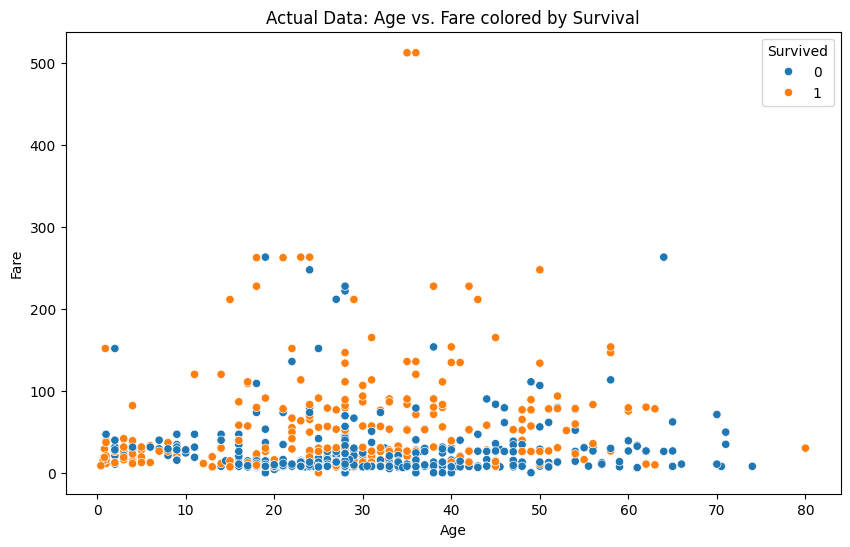

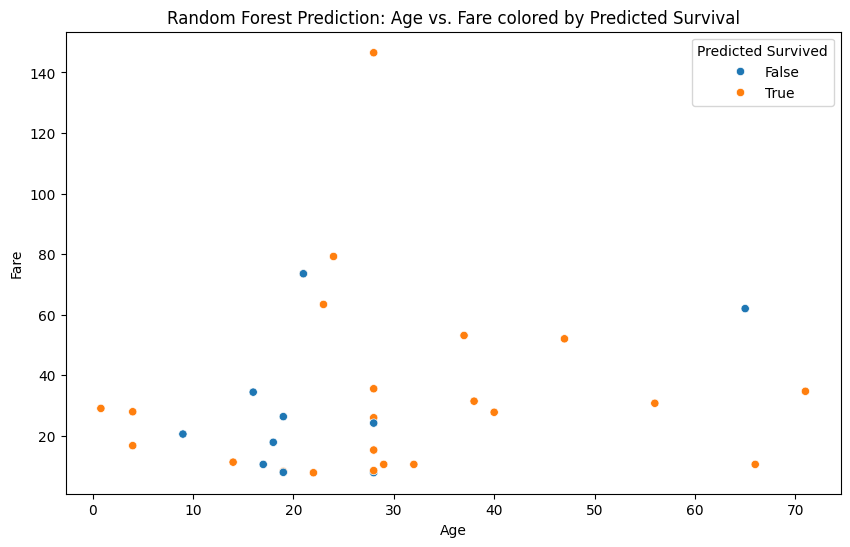

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Survived' is your target variable
# Create a scatter plot of 'Age' vs 'Fare' colored by 'Survived' (actual data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.title('Actual Data: Age vs. Fare colored by Survival')
plt.show()


# Create a scatter plot of 'Age' vs 'Fare' colored by predicted 'Survived' (using one of the models)
# For example, using the Random Forest model
y_pred_rf_series = pd.Series(y_pred_rf, name='Predicted Survived')
X_test_with_pred = X_test.copy()
X_test_with_pred['Predicted Survived'] = y_pred_rf_series
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Predicted Survived', data=X_test_with_pred)
plt.title('Random Forest Prediction: Age vs. Fare colored by Predicted Survival')
plt.show()

In [ ]:
# 4. Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting
print("\nGradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        60
        True       1.00      1.00      1.00       119

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [ ]:
from sklearn.neural_network import MLPClassifier

# 5. Neural Network Model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

# Evaluate Neural Network
print("\nNeural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))


Neural Network Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        60
        True       1.00      1.00      1.00       119

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# 6. AdaBoost Model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

# Evaluate AdaBoost
print("\nAdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        60
        True       1.00      1.00      1.00       119

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier with the best performing models
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('ada', ada_model)
], voting='hard')  # 'hard' voting for majority class prediction

voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)

# Evaluate Voting Classifier
print("\nVoting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Voting Classifier Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        60
        True       1.00      1.00      1.00       119

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 7. K-Nearest Neighbors (KNN) Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN
print("\nK-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 0.7653631284916201
              precision    recall  f1-score   support

       False       0.80      0.40      0.53        60
        True       0.76      0.95      0.84       119

    accuracy                           0.77       179
   macro avg       0.78      0.67      0.69       179
weighted avg       0.77      0.77      0.74       179



In [ ]:
from xgboost import XGBClassifier

# 8. XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))



XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        60
        True       1.00      1.00      1.00       119

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [ ]:
from sklearn.ensemble import BaggingClassifier

# 9. Bagging Model with Decision Tree
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate Bagging
print("\nBagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))



Bagging Classifier Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        60
        True       1.00      1.00      1.00       119

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use the best model from the grid search to make predictions
y_pred_gb_grid = grid_search.predict(X_test)

# Evaluate the model
print("\nGradient Boosting (Grid Search) Accuracy:", accuracy_score(y_test, y_pred_gb_grid))
print(classification_report(y_test, y_pred_gb_grid))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best Accuracy: 1.0

Gradient Boosting (Grid Search) Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        60
        True       1.00      1.00      1.00       119

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

